First look at the fs output - visualizing the coancestry matrix

In [1]:
%run ../scripts/notebook_settings.py

Path to chunkcount and chunklength - respectively the average number of times in each donor, and the average length how long it spends in those.

In [2]:
chunkcount_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/fs/test_run_linked.chunkcounts.out"
chunklength_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/steps/fs/test_run_linked.chunklengths.out"
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
vcf = "/faststorage/project/baboondiversity/data/haploidified_chrX_males/hap_chrX_males.vcf.gz"

Loading in the data as tables - due to an odd reason, the header line is different in the two files.

In [3]:
cc_df = pd.read_table(chunkcount_path, sep=" ", header=1)
cl_df = pd.read_table(chunklength_path, sep=" ", header=0)

In [4]:
cl_df.iloc[:,1:]

,PD_0215,PD_0217,PD_0223,PD_0227,PD_0228,PD_0229,PD_0230,PD_0231,PD_0233,PD_0234,...,PD_0718,PD_0719,PD_0395,PD_0396,PD_0397,PD_0398,PD_0399,PD_0400,PD_0401,PD_0692
0,0.000000,448.017563,42.586699,52.287504,28.647400,42.183460,33.740893,54.340813,92.171467,65.111288,...,1.034183,1.918284,1.146038,1.536036,1.219573,1.123953,1.040635,1.612476,1.312069,14.145269
1,458.276433,0.000000,33.982266,67.635207,40.310741,23.131119,27.788938,40.004195,55.997083,67.328869,...,1.590324,1.911116,1.616925,1.629228,1.403697,1.852222,1.363194,1.551188,1.482651,20.959804
2,48.718899,36.425707,0.000000,157.791443,5.492248,3.723688,5.093936,5.971563,6.192123,8.191263,...,1.088638,0.973599,0.696195,0.784605,0.847715,1.492368,0.985745,0.928961,0.763472,12.118445
3,43.424237,53.591600,133.452106,0.000000,7.818750,4.602197,6.563418,12.605532,16.013818,30.879618,...,0.831187,0.921647,1.136795,0.792621,0.903732,0.909496,1.014880,0.950519,1.039809,10.043860
4,16.864910,40.102515,5.828121,8.848579,0.000000,409.232198,541.633893,246.276892,189.257420,146.814843,...,1.246117,1.264431,1.570141,1.535294,1.550322,1.646811,1.579730,1.398853,1.825126,45.905300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.214954,0.183266,0.058430,0.115409,0.370936,0.118724,0.145162,0.094691,0.151641,0.121169,...,0.600655,0.572617,259.574624,315.915338,1349.667040,0.000000,383.403218,259.762239,245.949545,0.360208
122,0.120848,0.158718,0.134602,0.072056,0.094932,0.080987,0.110171,0.123821,0.133148,0.106104,...,0.418686,0.549548,423.651043,538.567712,491.061635,318.758200,0.000000,600.750520,446.332294,0.241604
123,0.178490,0.168702,0.073343,0.110145,0.145936,0.142287,0.116212,0.147253,0.160335,0.187776,...,0.517325,0.703047,435.436045,425.632632,327.382153,225.571051,617.126176,0.000000,782.140369,0.451441
124,0.224313,0.231525,0.075076,0.079419,0.159864,0.141198,0.109548,0.148822,0.430545,0.145524,...,0.498303,0.599221,431.306698,461.525636,326.310189,241.438172,469.961960,883.622434,0.000000,0.558238


Generating heatmaps to visualize.

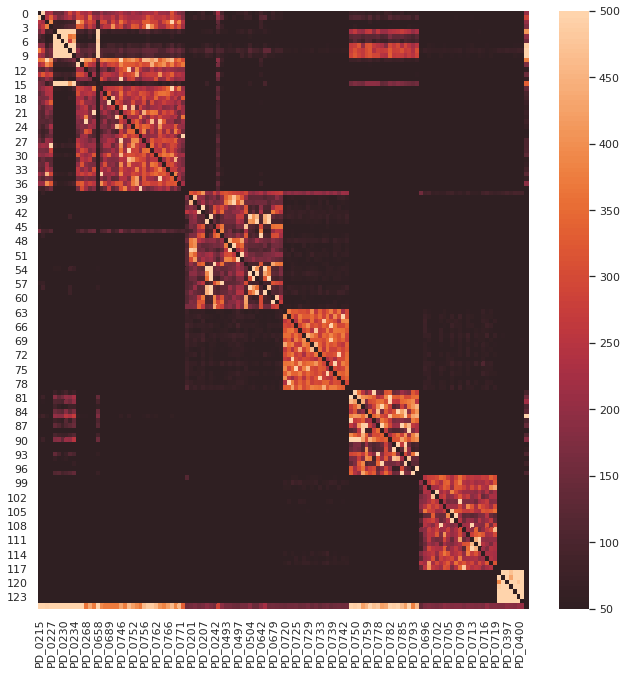

In [5]:
fig, ax = plt.subplots(figsize = (11, 11))
g = sns.heatmap(cc_df.iloc[:,1:], vmin=50, vmax=500, center=0)

This heatmap has many informative parts.
Firstly, the 8 clusters that I am working with are well-supported (I did partly condition on Species, but both Cynocephalus in Western Tanzania and Anubis in Ethiopia jump clearly out).
Some Anubis individuals in Tanzania seem to be admixed.
Ignore Ursinus (last ind), as it is the only male.
Kindae and Cyno in Western Tanzania have an interesting relation.

<AxesSubplot:>

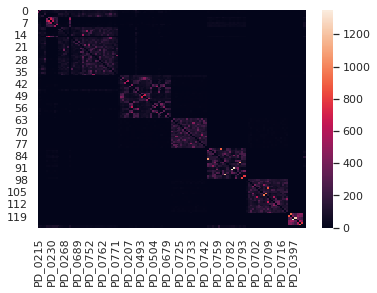

In [6]:
sns.heatmap(cl_df.iloc[:,1:])

Fishing out the individuals and their sampling location

In [7]:
meta_subset = meta_data_samples.loc[meta_data_samples.PGDP_ID.isin(cc_df["Recipient"])]

In [8]:
sorter = cc_df["Recipient"]
sorterIndex = dict(zip(sorter, range(len(sorter))))
meta_subset['ID_Rank'] = meta_subset['PGDP_ID'].map(sorterIndex)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
meta_subset.sort_values(["ID_Rank"])["C_origin"].values

array(['Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Western Tanzania', 'Cynocephalus, Western Tanzania',
       'Cynocephalus, Western Tanzania', 'Cynocephalus, Western Tanzania',
       'Cynocephalus, Western Tanzania', 'Cynocephalus, Western Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Western Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Central Tanzania', 'Cynocephalus, Central Tanzania',
       'Cynocephalus, Cen

In [10]:
len(meta_subset.loc[meta_subset.Species == "cynocephalus"])

38

So we can see that Cynocephalus are the first, and there are 38

<AxesSubplot:>

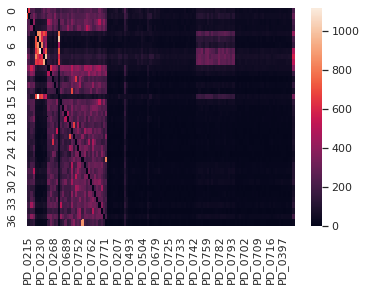

In [11]:
sns.heatmap(cc_df.iloc[:38,1:])

In [12]:
cl_df.iloc[:,1:]

,PD_0215,PD_0217,PD_0223,PD_0227,PD_0228,PD_0229,PD_0230,PD_0231,PD_0233,PD_0234,...,PD_0718,PD_0719,PD_0395,PD_0396,PD_0397,PD_0398,PD_0399,PD_0400,PD_0401,PD_0692
0,0.000000,448.017563,42.586699,52.287504,28.647400,42.183460,33.740893,54.340813,92.171467,65.111288,...,1.034183,1.918284,1.146038,1.536036,1.219573,1.123953,1.040635,1.612476,1.312069,14.145269
1,458.276433,0.000000,33.982266,67.635207,40.310741,23.131119,27.788938,40.004195,55.997083,67.328869,...,1.590324,1.911116,1.616925,1.629228,1.403697,1.852222,1.363194,1.551188,1.482651,20.959804
2,48.718899,36.425707,0.000000,157.791443,5.492248,3.723688,5.093936,5.971563,6.192123,8.191263,...,1.088638,0.973599,0.696195,0.784605,0.847715,1.492368,0.985745,0.928961,0.763472,12.118445
3,43.424237,53.591600,133.452106,0.000000,7.818750,4.602197,6.563418,12.605532,16.013818,30.879618,...,0.831187,0.921647,1.136795,0.792621,0.903732,0.909496,1.014880,0.950519,1.039809,10.043860
4,16.864910,40.102515,5.828121,8.848579,0.000000,409.232198,541.633893,246.276892,189.257420,146.814843,...,1.246117,1.264431,1.570141,1.535294,1.550322,1.646811,1.579730,1.398853,1.825126,45.905300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.214954,0.183266,0.058430,0.115409,0.370936,0.118724,0.145162,0.094691,0.151641,0.121169,...,0.600655,0.572617,259.574624,315.915338,1349.667040,0.000000,383.403218,259.762239,245.949545,0.360208
122,0.120848,0.158718,0.134602,0.072056,0.094932,0.080987,0.110171,0.123821,0.133148,0.106104,...,0.418686,0.549548,423.651043,538.567712,491.061635,318.758200,0.000000,600.750520,446.332294,0.241604
123,0.178490,0.168702,0.073343,0.110145,0.145936,0.142287,0.116212,0.147253,0.160335,0.187776,...,0.517325,0.703047,435.436045,425.632632,327.382153,225.571051,617.126176,0.000000,782.140369,0.451441
124,0.224313,0.231525,0.075076,0.079419,0.159864,0.141198,0.109548,0.148822,0.430545,0.145524,...,0.498303,0.599221,431.306698,461.525636,326.310189,241.438172,469.961960,883.622434,0.000000,0.558238


In [13]:
import numpy as np
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=6)

In [15]:
pca.fit(cl_df.iloc[:,1:])

PCA(n_components=6)

In [38]:
pca.explained_variance_ratio_

array([0.11225569, 0.10970461, 0.10630004, 0.09556612, 0.07881524,
       0.05423422])

In [16]:
X = pca.transform(cl_df.iloc[:,1:])

In [37]:
cl_df.iloc[:,0].values
meta_subset = meta_data_samples.loc[meta_data_samples.PGDP_ID.isin(cl_df.iloc[:,0].values)]

In [31]:
o_list = []
for ID in cl_df.iloc[:,0].values:
    print(ID)
    if ID[0] == "S":
        ID = ID[4:]
    o_list.append(meta_data_samples.loc[meta_data_samples.PGDP_ID == ID].C_origin.values[0])

PD_0215
PD_0217
PD_0223
PD_0227
PD_0228
PD_0229
PD_0230
PD_0231
PD_0233
PD_0234
PD_0235
PD_0236
PD_0268
PD_0269
PD_0637
PD_0658
PD_0687
PD_0688
PD_0689
PD_0690
PD_0691
PD_0746
PD_0747
PD_0748
PD_0752
PD_0753
PD_0755
PD_0756
PD_0757
PD_0761
PD_0762
PD_0763
PD_0764
PD_0766
PD_0767
PD_0768
PD_0771
PD_0775
Sci_30877
PD_0201
PD_0202
PD_0204
PD_0207
PD_0218
PD_0220
PD_0242
PD_0266
PD_0267
PD_0493
PD_0494
PD_0496
PD_0497
PD_0498
PD_0502
PD_0504
PD_0505
PD_0508
PD_0642
PD_0650
PD_0654
PD_0679
PD_0681
PD_0684
PD_0720
PD_0722
PD_0723
PD_0725
PD_0727
PD_0728
PD_0729
PD_0731
PD_0732
PD_0733
PD_0734
PD_0735
PD_0739
PD_0740
PD_0741
PD_0742
PD_0743
PD_0749
PD_0750
PD_0751
PD_0758
PD_0759
PD_0776
PD_0777
PD_0778
PD_0779
PD_0780
PD_0782
PD_0783
PD_0784
PD_0785
PD_0786
PD_0787
PD_0793
PD_0794_BAB
Sci_97124
PD_0696
PD_0697
PD_0699
PD_0702
PD_0703
PD_0704
PD_0705
PD_0706
PD_0707
PD_0709
PD_0711
PD_0712
PD_0713
PD_0714
PD_0715
PD_0716
PD_0717
PD_0718
PD_0719
PD_0395
PD_0396
PD_0397
PD_0398
PD_0399
PD_0400


In [26]:
o_list

['Ruaha, Tanzania',
 'Ruaha, Tanzania',
 'Udzungwa, Tanzania',
 'Udzungwa, Tanzania',
 'Mahale, Tanzania',
 'Mahale, Tanzania',
 'Mahale, Tanzania',
 'Mahale, Tanzania',
 'Katavi, Tanzania',
 'Katavi, Tanzania',
 'Selous, Tanzania',
 'Selous, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mahale, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Mikumi, Tanzania',
 'Aberdare, Kenya',
 'Serengeti, Tanzania',
 'Serengeti, Tanzania',
 'Arusha, Tanzania',
 'Arusha, Tanzania',
 'Gombe, Tanzania',
 'Gombe, Tanzania',
 'Lake Manyara, Tanzania',
 'Tarangire, Tanzania',

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0.5, 1.0, 'PCA on chrX, males'),
 Text(0.5, 0, 'pc1'),
 Text(0, 0.5, 'pc4')]

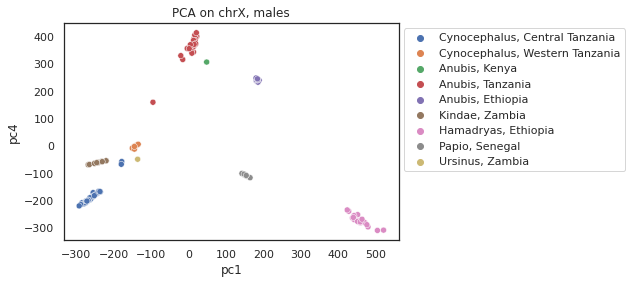

In [41]:
def offset_legend(fig):
    ax = fig.add_subplot(111)
    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc='best', bbox_to_anchor=(1,1))
    return lgd
scatter_sns = sns.scatterplot(x= X[:, 0], y=X[:, 3], hue=o_list)
fig = scatter_sns.get_figure()
lgd = offset_legend(fig)
scatter_sns.set(title="PCA on chrX, males", xlabel="pc1", ylabel="pc4")